In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

%matplotlib inline

In [70]:
def I_pr(r, alpha=0.48, b=3.3, q=0.92):
    """
    from FRICKE et al (2001)
    """
    
    P = (r/(b*alpha))**3 + (r/alpha * (1.0-q)/q)
    I = np.exp(-r/alpha) * (1.0 - q*np.exp(-P))
    return I*r

In [77]:
r = np.linspace(0, 10, 1000) # kpc
I_r = I_pr(r)

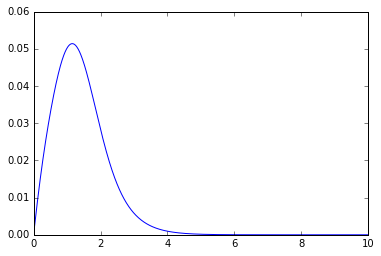

In [72]:
plt.plot(r, I_r)

Computing the effective radius $r_e$:
    


In [78]:
Itotal = integrate.quad(I_pr, 0, np.inf)
r_e=np.linspace(0.5, 3.0, 10000)
Ihalf = integrate.quad(I_pr, 0, r_e[0])
i=0

while Ihalf[0] <= 0.5*Itotal[0]:
    Ihalf = integrate.quad(I_pr, 0, r_e[i])
    i+=1

In [84]:
print(r_e[i-1]) # kpc

1.30808080808


In [80]:
L_B = 8.9E8 # L_sun /  pc^2
I_B = L_B/(2.0*np.pi*r_e[i-1]**2.0*1E6)

print(I_B)

82.7829675495


In [87]:
log_sigma = (np.log10(I_B) + 1.21*np.log10(r_e[i-1])-0.55)/1.6# Numbers for band V here assuming the same for band B
sigma = 10**(log_sigma)
M_dyn = 1.16E9 * (sigma/100.0)**2 * r_e[i-1] 

print(log_sigma)
print(sigma) #km/s
print(np.log10(M_dyn)) # <- does this make sense? The observed stellar mass is 1.5E8Msun 

0.943168015606
8.77340172291
7.06742859426
